# Importing Libraries

Importing standard libraries necessary to organize and split data for neural network training. To use the LSTM Recurrent neural network, we use the tensorflow library keras. The model uses "Adam" as the optimizer and the activation function used is "Relu"

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error as mse

In [62]:
ld = pd.read_csv("Load_data.csv")
ld.head()

,Load
0,1001
1,967
2,946
3,939
4,934


17544

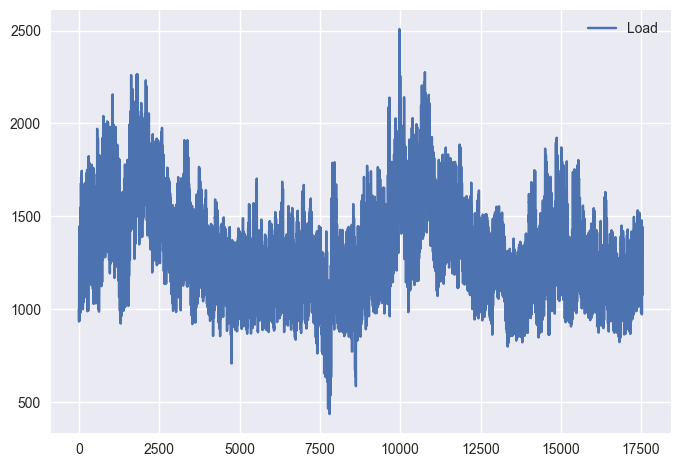

In [63]:
ld.plot()
ld.size

In [64]:
da = pd.date_range(start='11/1/2003', end='11/1/2005', periods=17545, closed='right')
r = np.array(da, dtype='datetime64[h]')
rr = pd.DataFrame(r, columns=['Time'])
rr.tail()


C:\Users\prede\AppData\Local\Temp\ipykernel_14592\1644015983.py:1: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  da = pd.date_range(start='11/1/2003', end='11/1/2005', periods=17545, closed='right')


,Time
17539,2005-10-31 20:00:00
17540,2005-10-31 21:00:00
17541,2005-10-31 22:00:00
17542,2005-10-31 23:00:00
17543,2005-11-01 00:00:00


In [65]:
ldd = pd.concat([rr, ld], axis=1)
ldd.Time = pd.to_datetime(ldd.Time)
print(ldd.info())
ldd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    17544 non-null  datetime64[ns]
 1   Load    17544 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 274.2 KB
None


,Time,Load
0,2003-11-01 01:00:00,1001
1,2003-11-01 02:00:00,967
2,2003-11-01 03:00:00,946
3,2003-11-01 04:00:00,939
4,2003-11-01 05:00:00,934


In [66]:
temp = pd.read_csv("temp.csv")
ldt = pd.concat([ldd, temp], axis=1)
ldt=ldt.set_index("Time")
ldt.head()
#The dataframe including the temperature data

,Load,Temp (C)
Time,,
2003-11-01 01:00:00,1001,16.8
2003-11-01 02:00:00,967,15.9
2003-11-01 03:00:00,946,15.9
2003-11-01 04:00:00,939,16.9
2003-11-01 05:00:00,934,16.3


In [67]:
# ldt.plot(y='Load', xlim=[dt.datetime(2005,2,1,1,0,0),dt.datetime(2005,2,8,23,0,0)])

In [68]:
#Generating the time in "Seconds" to generate a cos and sin map for periodicity relevance
ldt['Sec'] = ldt.index.map(pd.Timestamp.timestamp)
ldt

,Load,Temp (C),Sec
Time,,,
2003-11-01 01:00:00,1001,16.8,1.067648e+09
2003-11-01 02:00:00,967,15.9,1.067652e+09
2003-11-01 03:00:00,946,15.9,1.067656e+09
2003-11-01 04:00:00,939,16.9,1.067659e+09
2003-11-01 05:00:00,934,16.3,1.067663e+09
...,...,...,...
2005-10-31 20:00:00,1352,11.7,1.130789e+09
2005-10-31 21:00:00,1348,11.3,1.130792e+09
2005-10-31 22:00:00,1266,11.4,1.130796e+09


In [69]:
day = 86400 
#86400 is the number of seconds in a day
year = 31556952 
#31556952 is the number of seconds in an year

ldt['DSin'] = np.sin(ldt['Sec'] * (2*np.pi /day))
ldt['DCos'] = np.cos(ldt['Sec'] * (2*np.pi /day))
ldt['YSin'] = np.sin(ldt['Sec'] * (2*np.pi /year))
ldt['YCos'] = np.cos(ldt['Sec'] * (2*np.pi /year))
ldt.head()

,Load,Temp (C),Sec,DSin,DCos,YSin,YCos
Time,,,,,,,
2003-11-01 01:00:00,1001,16.8,1.067648e+09,0.258819,0.965926,-0.868846,0.495082
2003-11-01 02:00:00,967,15.9,1.067652e+09,0.500000,0.866025,-0.868491,0.495704
2003-11-01 03:00:00,946,15.9,1.067656e+09,0.707107,0.707107,-0.868136,0.496327
2003-11-01 04:00:00,939,16.9,1.067659e+09,0.866025,0.500000,-0.867780,0.496949
2003-11-01 05:00:00,934,16.3,1.067663e+09,0.965926,0.258819,-0.867423,0.497571


In [70]:
ldt =ldt.drop('Sec', axis=1)
ldt.head()
#Dropping the "Seconds" column

,Load,Temp (C),DSin,DCos,YSin,YCos
Time,,,,,,
2003-11-01 01:00:00,1001,16.8,0.258819,0.965926,-0.868846,0.495082
2003-11-01 02:00:00,967,15.9,0.500000,0.866025,-0.868491,0.495704
2003-11-01 03:00:00,946,15.9,0.707107,0.707107,-0.868136,0.496327
2003-11-01 04:00:00,939,16.9,0.866025,0.500000,-0.867780,0.496949
2003-11-01 05:00:00,934,16.3,0.965926,0.258819,-0.867423,0.497571


The Day sin and cos values with the Year sin and cos values shows the model that there exists a periodicity with a period of 24 hrs and as well as an whole year since the whole year is periodic in nature with offsets based on variable usage

## Splitting the dataset based on seasons

In [71]:
win = pd.concat([ldt['2003-12-01':'2004-02-29'],ldt['2004-12-01':'2005-02-28']])
frames = [ldt['2003-11-01':'2003-11-30'],ldt['2004-09-01':'2004-11-30'],ldt['2005-09-01':'2005-10-30']]
fal = pd.concat(frames)
spr = pd.concat([ldt['2004-03-01':'2004-05-31'],ldt['2005-03-01':'2005-05-31']])
sue = pd.concat([ldt['2004-06-01':'2004-08-31'],ldt['2005-06-01':'2005-08-31']])


win.to_csv('win.csv',index=False)
fal.to_csv('fal.csv',index=False)
spr.to_csv('spr.csv',index=False)
sue.to_csv('sum.csv',index=False)

In [72]:
len(sue['2004-06-01':'2004-08-31'])

2208

## Sliding Window

In [73]:
#We generate the sliding window which is required for the LSTM model. The window size can be arbitrary and can depend on the dataset. Here, we use 5 hours of previous data to predict the next hour, Hence the size of the window will be 5. This can also be changed later for further tweaks to increase the accuracy of the model.
def dataframe_win(df, w_size=7):
    df_np = df.to_numpy()
    X=[]
    y=[]
    for i in range(len(df_np)-w_size):
        row =[r for r in df_np[i:i+w_size]]
        X.append(row)
        label = df_np[i+w_size][0]
        y.append(label)
    return np.array(X), np.array(y)


# Winter season dataset training and prediction

In [74]:
X, y = dataframe_win(win)
X.shape, y.shape

((4337, 7, 6), (4337,))

In [75]:
X_train, y_train = X[:2184], y[:2184]
X_val, y_val = X[2184:3672], y[2184:3672]
X_test, y_test = X[3672:], y[3672:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2184, 7, 6), (2184,), (1488, 7, 6), (1488,), (665, 7, 6), (665,))

In [76]:
load_train_mean = np.mean(X_train[:, :, 0])
load_train_std = np.std(X_train[:, :, 0])

temp_train_mean = np.mean(X_train[:, :, 1])
temp_train_std = np.std(X_train[:, :, 1])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - load_train_mean) / load_train_std
  X[:, :, 1] = (X[:, :, 1] - temp_train_mean) / temp_train_std

def preprocess_output(y):
  y[:] = (y[:] - load_train_mean) / load_train_std
  


In [77]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)
preprocess_output(y_train)
preprocess_output(y_val)
preprocess_output(y_test)

In [78]:
model = Sequential()
model.add(InputLayer((7, 6)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                18176     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,705
Trainable params: 18,705
Non-trainable params: 0
_________________________________________________________________


In [79]:
cp = ModelCheckpoint('modelWIN_LSTM/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [80]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp])

Epoch 1/20
66/69 [===========================>..] - ETA: 0s - loss: 0.8628 - root_mean_squared_error: 0.9289

INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


69/69 [==============================] - 16s 175ms/step - loss: 0.8545 - root_mean_squared_error: 0.9244 - val_loss: 0.7740 - val_root_mean_squared_error: 0.8798
Epoch 2/20
65/69 [===========================>..] - ETA: 0s - loss: 0.6223 - root_mean_squared_error: 0.7889

INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


69/69 [==============================] - 10s 149ms/step - loss: 0.6152 - root_mean_squared_error: 0.7844 - val_loss: 0.5667 - val_root_mean_squared_error: 0.7528
Epoch 3/20
69/69 [==============================] - ETA: 0s - loss: 0.4494 - root_mean_squared_error: 0.6703

INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


69/69 [==============================] - 11s 156ms/step - loss: 0.4494 - root_mean_squared_error: 0.6703 - val_loss: 0.4031 - val_root_mean_squared_error: 0.6349
Epoch 4/20
64/69 [==========================>...] - ETA: 0s - loss: 0.3332 - root_mean_squared_error: 0.5773

INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


69/69 [==============================] - 10s 143ms/step - loss: 0.3291 - root_mean_squared_error: 0.5737 - val_loss: 0.2971 - val_root_mean_squared_error: 0.5451
Epoch 5/20
68/69 [============================>.] - ETA: 0s - loss: 0.2564 - root_mean_squared_error: 0.5063

INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


69/69 [==============================] - 11s 155ms/step - loss: 0.2560 - root_mean_squared_error: 0.5060 - val_loss: 0.2407 - val_root_mean_squared_error: 0.4906
Epoch 6/20
64/69 [==========================>...] - ETA: 0s - loss: 0.2112 - root_mean_squared_error: 0.4595

INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


69/69 [==============================] - 11s 161ms/step - loss: 0.2110 - root_mean_squared_error: 0.4594 - val_loss: 0.2134 - val_root_mean_squared_error: 0.4620
Epoch 7/20
65/69 [===========================>..] - ETA: 0s - loss: 0.1807 - root_mean_squared_error: 0.4251

INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


69/69 [==============================] - 10s 152ms/step - loss: 0.1804 - root_mean_squared_error: 0.4247 - val_loss: 0.1954 - val_root_mean_squared_error: 0.4420
Epoch 8/20
68/69 [============================>.] - ETA: 0s - loss: 0.1562 - root_mean_squared_error: 0.3953

INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


69/69 [==============================] - 12s 174ms/step - loss: 0.1561 - root_mean_squared_error: 0.3951 - val_loss: 0.1788 - val_root_mean_squared_error: 0.4229
Epoch 9/20
66/69 [===========================>..] - ETA: 0s - loss: 0.1357 - root_mean_squared_error: 0.3683

INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


69/69 [==============================] - 9s 138ms/step - loss: 0.1359 - root_mean_squared_error: 0.3686 - val_loss: 0.1677 - val_root_mean_squared_error: 0.4095
Epoch 10/20
65/69 [===========================>..] - ETA: 0s - loss: 0.1187 - root_mean_squared_error: 0.3446

INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


69/69 [==============================] - 11s 156ms/step - loss: 0.1185 - root_mean_squared_error: 0.3442 - val_loss: 0.1541 - val_root_mean_squared_error: 0.3926
Epoch 11/20
67/69 [============================>.] - ETA: 0s - loss: 0.1026 - root_mean_squared_error: 0.3203

INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


69/69 [==============================] - 12s 178ms/step - loss: 0.1030 - root_mean_squared_error: 0.3210 - val_loss: 0.1458 - val_root_mean_squared_error: 0.3818
Epoch 12/20
66/69 [===========================>..] - ETA: 0s - loss: 0.0906 - root_mean_squared_error: 0.3010

INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


69/69 [==============================] - 13s 189ms/step - loss: 0.0897 - root_mean_squared_error: 0.2996 - val_loss: 0.1326 - val_root_mean_squared_error: 0.3641
Epoch 13/20
67/69 [============================>.] - ETA: 0s - loss: 0.0784 - root_mean_squared_error: 0.2800

INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


69/69 [==============================] - 12s 180ms/step - loss: 0.0784 - root_mean_squared_error: 0.2800 - val_loss: 0.1249 - val_root_mean_squared_error: 0.3534
Epoch 14/20
62/69 [=========================>....] - ETA: 0s - loss: 0.0692 - root_mean_squared_error: 0.2630

INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


69/69 [==============================] - 13s 191ms/step - loss: 0.0691 - root_mean_squared_error: 0.2628 - val_loss: 0.1201 - val_root_mean_squared_error: 0.3466
Epoch 15/20
65/69 [===========================>..] - ETA: 0s - loss: 0.0615 - root_mean_squared_error: 0.2479

INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


69/69 [==============================] - 13s 189ms/step - loss: 0.0614 - root_mean_squared_error: 0.2477 - val_loss: 0.1149 - val_root_mean_squared_error: 0.3389
Epoch 16/20
69/69 [==============================] - ETA: 0s - loss: 0.0557 - root_mean_squared_error: 0.2361

INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


69/69 [==============================] - 13s 192ms/step - loss: 0.0557 - root_mean_squared_error: 0.2361 - val_loss: 0.1093 - val_root_mean_squared_error: 0.3306
Epoch 17/20
69/69 [==============================] - ETA: 0s - loss: 0.0510 - root_mean_squared_error: 0.2258

INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


69/69 [==============================] - 14s 207ms/step - loss: 0.0510 - root_mean_squared_error: 0.2258 - val_loss: 0.1081 - val_root_mean_squared_error: 0.3287
Epoch 18/20
66/69 [===========================>..] - ETA: 0s - loss: 0.0474 - root_mean_squared_error: 0.2177

INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


69/69 [==============================] - 11s 160ms/step - loss: 0.0474 - root_mean_squared_error: 0.2178 - val_loss: 0.1071 - val_root_mean_squared_error: 0.3273
Epoch 19/20
67/69 [============================>.] - ETA: 0s - loss: 0.0452 - root_mean_squared_error: 0.2126

INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


69/69 [==============================] - 13s 186ms/step - loss: 0.0451 - root_mean_squared_error: 0.2124 - val_loss: 0.1037 - val_root_mean_squared_error: 0.3221
Epoch 20/20
65/69 [===========================>..] - ETA: 0s - loss: 0.0433 - root_mean_squared_error: 0.2080

INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


INFO:tensorflow:Assets written to: modelWIN_LSTM\assets


69/69 [==============================] - 12s 183ms/step - loss: 0.0428 - root_mean_squared_error: 0.2069 - val_loss: 0.1019 - val_root_mean_squared_error: 0.3193


In [81]:
from tensorflow.keras.models import load_model
model = load_model('modelWIN_LSTM/')

In [82]:
def postprocess_output(y):
  y[:] = (y[:] * load_train_std)  + load_train_mean
  

In [83]:
l_preds = model.predict(X_test).flatten()
l_actuals = y_test

m = tf.keras.metrics.RootMeanSquaredError()
m.update_state(l_actuals, l_preds)
rms= m.result().numpy()
print("The root mean squared error for the prediction:", rms , "->" , (rms*100),"%")

21/21 [==============================] - 1s 4ms/step
The root mean squared error for the prediction: 0.19034198 -> 19.0341979265213 %


In [84]:
postprocess_output(l_preds)
postprocess_output(l_actuals)

C:\Users\prede\AppData\Local\Temp\ipykernel_14592\247656550.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: title={'center': 'Load Prediction for Feb 5th,2005 to Feb 8th,2005'}, xlabel='Date and Time', ylabel='Load (Kw)'>

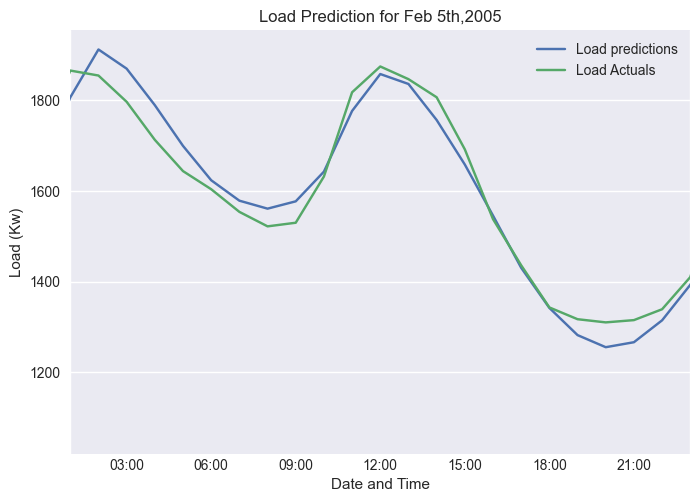

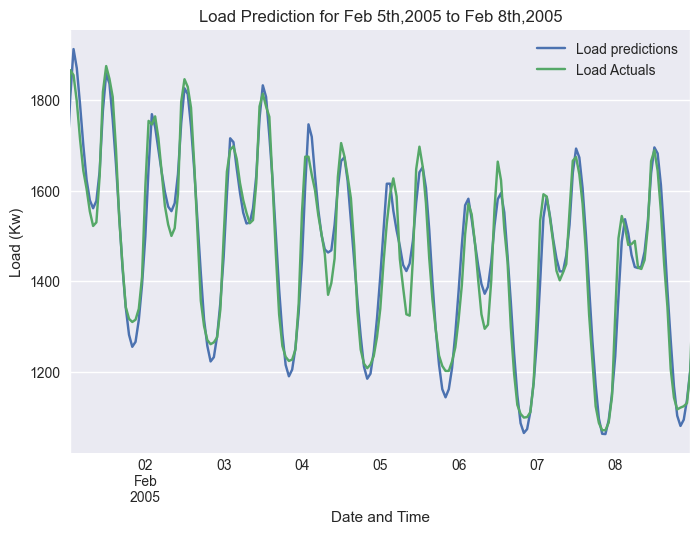

In [85]:
df = pd.DataFrame(data={'Load predictions': l_preds,
                          'Load Actuals':l_actuals,  })

#df.plot(xlim=[100,200])

temp=ldt['2005-02-01':'2005-02-28']
feb=temp.reset_index()

plt.style.use('seaborn')



winter= pd.concat([feb,df], axis=1)
winter.set_index("Time")
winter.plot(x='Time',y=['Load predictions', "Load Actuals"], xlim=[dt.datetime(2005,2,1,1,0,0),dt.datetime(2005,2,1,23,0,0)], ylabel='Load (Kw)', xlabel='Date and Time',title='Load Prediction for Feb 5th,2005')
winter.plot(x='Time',y=['Load predictions', "Load Actuals"], xlim=[dt.datetime(2005,2,1,1,0,0),dt.datetime(2005,2,8,23,0,0)], ylabel='Load (Kw)', xlabel='Date and Time',title='Load Prediction for Feb 5th,2005 to Feb 8th,2005')


# Spring season dataset training and prediction

In [86]:
X, y = dataframe_win(spr)
X.shape, y.shape

((4409, 7, 6), (4409,))

In [87]:
X_train, y_train = X[:2208], y[:2208]
X_val, y_val = X[2208:3672], y[2208:3672]
X_test, y_test = X[3672:], y[3672:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2208, 7, 6), (2208,), (1464, 7, 6), (1464,), (737, 7, 6), (737,))

In [88]:
load_train_mean = np.mean(X_train[:, :, 0])
load_train_std = np.std(X_train[:, :, 0])

temp_train_mean = np.mean(X_train[:, :, 1])
temp_train_std = np.std(X_train[:, :, 1])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - load_train_mean) / load_train_std
  X[:, :, 1] = (X[:, :, 1] - temp_train_mean) / temp_train_std

def preprocess_output(y):
  y[:] = (y[:] - load_train_mean) / load_train_std
  


In [89]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)
preprocess_output(y_train)
preprocess_output(y_val)
preprocess_output(y_test)

In [90]:
model = Sequential()
model.add(InputLayer((7, 6)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                18176     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,705
Trainable params: 18,705
Non-trainable params: 0
_________________________________________________________________


In [91]:
cp = ModelCheckpoint('modelSPR_LSTM/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [92]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp])

Epoch 1/20
63/69 [==========================>...] - ETA: 0s - loss: 0.8799 - root_mean_squared_error: 0.9380

INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


69/69 [==============================] - 12s 132ms/step - loss: 0.8680 - root_mean_squared_error: 0.9317 - val_loss: 0.6439 - val_root_mean_squared_error: 0.8024
Epoch 2/20
60/69 [=========================>....] - ETA: 0s - loss: 0.5766 - root_mean_squared_error: 0.7594

INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


69/69 [==============================] - 8s 119ms/step - loss: 0.5677 - root_mean_squared_error: 0.7535 - val_loss: 0.4694 - val_root_mean_squared_error: 0.6852
Epoch 3/20
69/69 [==============================] - ETA: 0s - loss: 0.3926 - root_mean_squared_error: 0.6266

INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


69/69 [==============================] - 8s 117ms/step - loss: 0.3926 - root_mean_squared_error: 0.6266 - val_loss: 0.3597 - val_root_mean_squared_error: 0.5998
Epoch 4/20
68/69 [============================>.] - ETA: 0s - loss: 0.2805 - root_mean_squared_error: 0.5296

INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


69/69 [==============================] - 8s 119ms/step - loss: 0.2798 - root_mean_squared_error: 0.5289 - val_loss: 0.3014 - val_root_mean_squared_error: 0.5490
Epoch 5/20
64/69 [==========================>...] - ETA: 0s - loss: 0.2226 - root_mean_squared_error: 0.4718

INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


69/69 [==============================] - 8s 123ms/step - loss: 0.2223 - root_mean_squared_error: 0.4714 - val_loss: 0.2700 - val_root_mean_squared_error: 0.5196
Epoch 6/20
67/69 [============================>.] - ETA: 0s - loss: 0.1899 - root_mean_squared_error: 0.4357

INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


69/69 [==============================] - 8s 112ms/step - loss: 0.1885 - root_mean_squared_error: 0.4342 - val_loss: 0.2414 - val_root_mean_squared_error: 0.4913
Epoch 7/20
65/69 [===========================>..] - ETA: 0s - loss: 0.1643 - root_mean_squared_error: 0.4054

INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


69/69 [==============================] - 8s 120ms/step - loss: 0.1641 - root_mean_squared_error: 0.4051 - val_loss: 0.2171 - val_root_mean_squared_error: 0.4659
Epoch 8/20
68/69 [============================>.] - ETA: 0s - loss: 0.1434 - root_mean_squared_error: 0.3787

INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


69/69 [==============================] - 9s 138ms/step - loss: 0.1451 - root_mean_squared_error: 0.3810 - val_loss: 0.1956 - val_root_mean_squared_error: 0.4423
Epoch 9/20
68/69 [============================>.] - ETA: 0s - loss: 0.1301 - root_mean_squared_error: 0.3607

INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


69/69 [==============================] - 8s 122ms/step - loss: 0.1295 - root_mean_squared_error: 0.3598 - val_loss: 0.1750 - val_root_mean_squared_error: 0.4184
Epoch 10/20
69/69 [==============================] - ETA: 0s - loss: 0.1168 - root_mean_squared_error: 0.3418

INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


69/69 [==============================] - 9s 129ms/step - loss: 0.1168 - root_mean_squared_error: 0.3418 - val_loss: 0.1584 - val_root_mean_squared_error: 0.3980
Epoch 11/20
66/69 [===========================>..] - ETA: 0s - loss: 0.1075 - root_mean_squared_error: 0.3279

INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


69/69 [==============================] - 9s 125ms/step - loss: 0.1069 - root_mean_squared_error: 0.3270 - val_loss: 0.1479 - val_root_mean_squared_error: 0.3846
Epoch 12/20
66/69 [===========================>..] - ETA: 0s - loss: 0.0976 - root_mean_squared_error: 0.3125

INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


69/69 [==============================] - 9s 128ms/step - loss: 0.0984 - root_mean_squared_error: 0.3137 - val_loss: 0.1354 - val_root_mean_squared_error: 0.3679
Epoch 13/20
65/69 [===========================>..] - ETA: 0s - loss: 0.0912 - root_mean_squared_error: 0.3020

INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


69/69 [==============================] - 8s 120ms/step - loss: 0.0913 - root_mean_squared_error: 0.3022 - val_loss: 0.1283 - val_root_mean_squared_error: 0.3582
Epoch 14/20
65/69 [===========================>..] - ETA: 0s - loss: 0.0852 - root_mean_squared_error: 0.2920

INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


69/69 [==============================] - 10s 146ms/step - loss: 0.0857 - root_mean_squared_error: 0.2927 - val_loss: 0.1180 - val_root_mean_squared_error: 0.3435
Epoch 15/20
63/69 [==========================>...] - ETA: 0s - loss: 0.0804 - root_mean_squared_error: 0.2836

INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


69/69 [==============================] - 8s 124ms/step - loss: 0.0802 - root_mean_squared_error: 0.2831 - val_loss: 0.1126 - val_root_mean_squared_error: 0.3356
Epoch 16/20
69/69 [==============================] - ETA: 0s - loss: 0.0759 - root_mean_squared_error: 0.2755

INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


69/69 [==============================] - 8s 124ms/step - loss: 0.0759 - root_mean_squared_error: 0.2755 - val_loss: 0.1029 - val_root_mean_squared_error: 0.3208
Epoch 17/20
65/69 [===========================>..] - ETA: 0s - loss: 0.0725 - root_mean_squared_error: 0.2692

INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


69/69 [==============================] - 9s 126ms/step - loss: 0.0719 - root_mean_squared_error: 0.2681 - val_loss: 0.0984 - val_root_mean_squared_error: 0.3136
Epoch 18/20
61/69 [=========================>....] - ETA: 0s - loss: 0.0675 - root_mean_squared_error: 0.2597

INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


69/69 [==============================] - 8s 121ms/step - loss: 0.0688 - root_mean_squared_error: 0.2622 - val_loss: 0.0937 - val_root_mean_squared_error: 0.3060
Epoch 19/20
65/69 [===========================>..] - ETA: 0s - loss: 0.0658 - root_mean_squared_error: 0.2565

INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


69/69 [==============================] - 8s 120ms/step - loss: 0.0656 - root_mean_squared_error: 0.2562 - val_loss: 0.0870 - val_root_mean_squared_error: 0.2950
Epoch 20/20
66/69 [===========================>..] - ETA: 0s - loss: 0.0635 - root_mean_squared_error: 0.2520

INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


INFO:tensorflow:Assets written to: modelSPR_LSTM\assets


69/69 [==============================] - 9s 132ms/step - loss: 0.0628 - root_mean_squared_error: 0.2507 - val_loss: 0.0847 - val_root_mean_squared_error: 0.2911


In [93]:
from tensorflow.keras.models import load_model
model = load_model('modelSPR_LSTM/')

In [94]:
def postprocess_output(y):
  y[:] = (y[:] * load_train_std)  + load_train_mean


In [95]:
l_preds = model.predict(X_test).flatten()
l_actuals = y_test

m = tf.keras.metrics.RootMeanSquaredError()
m.update_state(l_actuals, l_preds)
rms= m.result().numpy()
print("The root mean squared error for the prediction:", rms , "->" , (rms*100),"%")


24/24 [==============================] - 1s 4ms/step
The root mean squared error for the prediction: 0.25314492 -> 25.314491987228394 %


In [96]:
postprocess_output(l_preds)
postprocess_output(l_actuals)

<AxesSubplot: title={'center': 'Load Prediction for May 5th,2005 to May 8th,2005'}, xlabel='Date and Time', ylabel='Load (Kw)'>

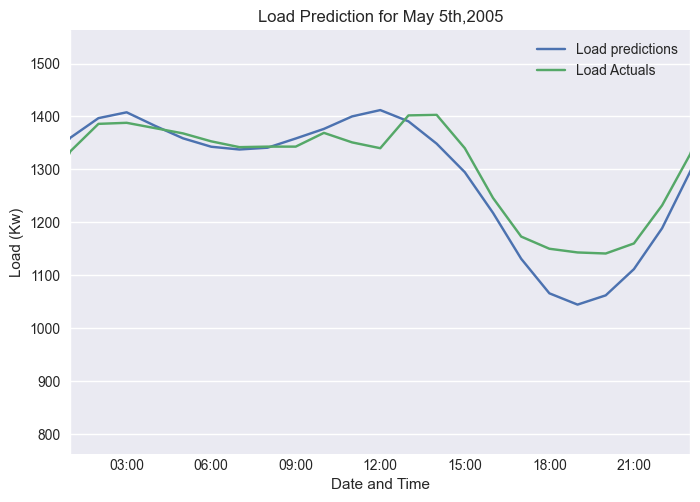

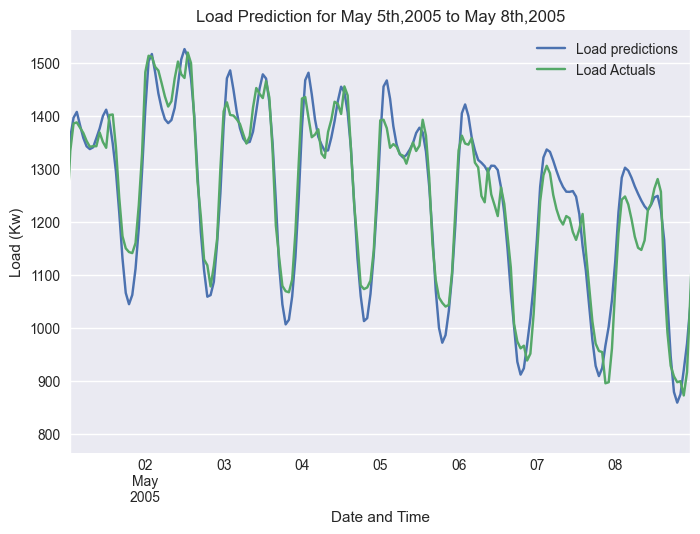

In [97]:

df = pd.DataFrame(data={'Load predictions': l_preds,
                          'Load Actuals':l_actuals,  })

#df.plot(xlim=[100,200])

temp=ldt['2005-05-01':'2005-05-31']
may=temp.reset_index()

# pd.concat([df.set_index(cols).value for df in dfs],axis=1, keys=keys)
spring= pd.concat([may,df], axis=1)
spring.set_index("Time")
spring.plot(x='Time',y=['Load predictions', "Load Actuals"], xlim=[dt.datetime(2005,5,1,1,0,0),dt.datetime(2005,5,1,23,0,0)], ylabel='Load (Kw)', xlabel='Date and Time',title='Load Prediction for May 5th,2005')
spring.plot(x='Time',y=['Load predictions', "Load Actuals"], xlim=[dt.datetime(2005,5,1,1,0,0),dt.datetime(2005,5,8,23,0,0)], ylabel='Load (Kw)', xlabel='Date and Time',title='Load Prediction for May 5th,2005 to May 8th,2005')

# Summer season dataset training and prediction

In [98]:
X, y = dataframe_win(sue)
X.shape, y.shape

((4409, 7, 6), (4409,))

In [99]:
X_train, y_train = X[:2208], y[:2208]
X_val, y_val = X[2208:3672], y[2208:3672]
X_test, y_test = X[3672:], y[3672:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2208, 7, 6), (2208,), (1464, 7, 6), (1464,), (737, 7, 6), (737,))

In [100]:
load_train_mean = np.mean(X_train[:, :, 0])
load_train_std = np.std(X_train[:, :, 0])

temp_train_mean = np.mean(X_train[:, :, 1])
temp_train_std = np.std(X_train[:, :, 1])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - load_train_mean) / load_train_std
  X[:, :, 1] = (X[:, :, 1] - temp_train_mean) / temp_train_std

def preprocess_output(y):
  y[:] = (y[:] - load_train_mean) / load_train_std



In [101]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)
preprocess_output(y_train)
preprocess_output(y_val)
preprocess_output(y_test)

In [102]:
model = Sequential()
model.add(InputLayer((7, 6)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                18176     
                                                                 
 dense_12 (Dense)            (None, 8)                 520       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,705
Trainable params: 18,705
Non-trainable params: 0
_________________________________________________________________


In [103]:
cp = ModelCheckpoint('modelSUE_LSTM/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [104]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp])

Epoch 1/20
65/69 [===========================>..] - ETA: 0s - loss: 0.9464 - root_mean_squared_error: 0.9728

INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


69/69 [==============================] - 12s 133ms/step - loss: 0.9377 - root_mean_squared_error: 0.9683 - val_loss: 1.7363 - val_root_mean_squared_error: 1.3177
Epoch 2/20
62/69 [=========================>....] - ETA: 0s - loss: 0.6877 - root_mean_squared_error: 0.8293

INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


69/69 [==============================] - 9s 130ms/step - loss: 0.6764 - root_mean_squared_error: 0.8224 - val_loss: 1.4876 - val_root_mean_squared_error: 1.2197
Epoch 3/20
63/69 [==========================>...] - ETA: 0s - loss: 0.4875 - root_mean_squared_error: 0.6982

INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


69/69 [==============================] - 8s 123ms/step - loss: 0.4824 - root_mean_squared_error: 0.6946 - val_loss: 1.1396 - val_root_mean_squared_error: 1.0675
Epoch 4/20
64/69 [==========================>...] - ETA: 0s - loss: 0.3141 - root_mean_squared_error: 0.5604

INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


69/69 [==============================] - 8s 120ms/step - loss: 0.3115 - root_mean_squared_error: 0.5582 - val_loss: 0.7611 - val_root_mean_squared_error: 0.8724
Epoch 5/20
68/69 [============================>.] - ETA: 0s - loss: 0.1908 - root_mean_squared_error: 0.4368

INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


69/69 [==============================] - 10s 152ms/step - loss: 0.1898 - root_mean_squared_error: 0.4357 - val_loss: 0.4674 - val_root_mean_squared_error: 0.6836
Epoch 6/20
67/69 [============================>.] - ETA: 0s - loss: 0.1418 - root_mean_squared_error: 0.3766

INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


69/69 [==============================] - 9s 130ms/step - loss: 0.1420 - root_mean_squared_error: 0.3769 - val_loss: 0.3480 - val_root_mean_squared_error: 0.5899
Epoch 7/20
67/69 [============================>.] - ETA: 0s - loss: 0.1233 - root_mean_squared_error: 0.3511

INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


69/69 [==============================] - 10s 148ms/step - loss: 0.1230 - root_mean_squared_error: 0.3507 - val_loss: 0.2993 - val_root_mean_squared_error: 0.5471
Epoch 8/20
66/69 [===========================>..] - ETA: 0s - loss: 0.1098 - root_mean_squared_error: 0.3314

INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


69/69 [==============================] - 8s 113ms/step - loss: 0.1085 - root_mean_squared_error: 0.3294 - val_loss: 0.2550 - val_root_mean_squared_error: 0.5050
Epoch 9/20
64/69 [==========================>...] - ETA: 0s - loss: 0.0942 - root_mean_squared_error: 0.3069

INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


69/69 [==============================] - 9s 132ms/step - loss: 0.0954 - root_mean_squared_error: 0.3088 - val_loss: 0.2171 - val_root_mean_squared_error: 0.4659
Epoch 10/20
68/69 [============================>.] - ETA: 0s - loss: 0.0857 - root_mean_squared_error: 0.2928

INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


69/69 [==============================] - 8s 120ms/step - loss: 0.0855 - root_mean_squared_error: 0.2924 - val_loss: 0.1811 - val_root_mean_squared_error: 0.4255
Epoch 11/20
65/69 [===========================>..] - ETA: 0s - loss: 0.0768 - root_mean_squared_error: 0.2772

INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


69/69 [==============================] - 9s 130ms/step - loss: 0.0772 - root_mean_squared_error: 0.2779 - val_loss: 0.1620 - val_root_mean_squared_error: 0.4024
Epoch 12/20
65/69 [===========================>..] - ETA: 0s - loss: 0.0716 - root_mean_squared_error: 0.2676

INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


69/69 [==============================] - 9s 133ms/step - loss: 0.0707 - root_mean_squared_error: 0.2659 - val_loss: 0.1406 - val_root_mean_squared_error: 0.3750
Epoch 13/20
69/69 [==============================] - ETA: 0s - loss: 0.0653 - root_mean_squared_error: 0.2555

INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


69/69 [==============================] - 8s 112ms/step - loss: 0.0653 - root_mean_squared_error: 0.2555 - val_loss: 0.1264 - val_root_mean_squared_error: 0.3555
Epoch 14/20
66/69 [===========================>..] - ETA: 0s - loss: 0.0611 - root_mean_squared_error: 0.2473

INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


69/69 [==============================] - 9s 135ms/step - loss: 0.0609 - root_mean_squared_error: 0.2468 - val_loss: 0.1198 - val_root_mean_squared_error: 0.3462
Epoch 15/20
68/69 [============================>.] - ETA: 0s - loss: 0.0577 - root_mean_squared_error: 0.2403

INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


69/69 [==============================] - 8s 124ms/step - loss: 0.0575 - root_mean_squared_error: 0.2398 - val_loss: 0.1077 - val_root_mean_squared_error: 0.3281
Epoch 16/20
68/69 [============================>.] - ETA: 0s - loss: 0.0545 - root_mean_squared_error: 0.2334

INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


69/69 [==============================] - 9s 131ms/step - loss: 0.0547 - root_mean_squared_error: 0.2339 - val_loss: 0.0982 - val_root_mean_squared_error: 0.3134
Epoch 17/20
68/69 [============================>.] - ETA: 0s - loss: 0.0525 - root_mean_squared_error: 0.2291

INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


69/69 [==============================] - 9s 129ms/step - loss: 0.0522 - root_mean_squared_error: 0.2285 - val_loss: 0.0917 - val_root_mean_squared_error: 0.3029
Epoch 18/20
63/69 [==========================>...] - ETA: 0s - loss: 0.0510 - root_mean_squared_error: 0.2259

INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


69/69 [==============================] - 9s 128ms/step - loss: 0.0502 - root_mean_squared_error: 0.2241 - val_loss: 0.0899 - val_root_mean_squared_error: 0.2999
Epoch 19/20
67/69 [============================>.] - ETA: 0s - loss: 0.0489 - root_mean_squared_error: 0.2211

INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


69/69 [==============================] - 8s 123ms/step - loss: 0.0488 - root_mean_squared_error: 0.2209 - val_loss: 0.0874 - val_root_mean_squared_error: 0.2956
Epoch 20/20
64/69 [==========================>...] - ETA: 0s - loss: 0.0469 - root_mean_squared_error: 0.2166

INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


INFO:tensorflow:Assets written to: modelSUE_LSTM\assets


69/69 [==============================] - 9s 137ms/step - loss: 0.0472 - root_mean_squared_error: 0.2172 - val_loss: 0.0869 - val_root_mean_squared_error: 0.2948


In [105]:
from tensorflow.keras.models import load_model
model = load_model('modelSUE_LSTM/')

In [106]:
def postprocess_output(y):
  y[:] = (y[:] * load_train_std)  + load_train_mean
  

In [107]:
l_preds = model.predict(X_test).flatten()
l_actuals = y_test

m = tf.keras.metrics.RootMeanSquaredError()
m.update_state(l_actuals, l_preds)
rms= m.result().numpy()
print("The root mean squared error for the prediction:", rms , "->" , (rms*100),"%")



24/24 [==============================] - 1s 4ms/step
The root mean squared error for the prediction: 0.22289924 -> 22.289924323558807 %


In [108]:
postprocess_output(l_preds)
postprocess_output(l_actuals)

<AxesSubplot: title={'center': 'Load Prediction for Aug 20th,2005 to Aug 28th,2005'}, xlabel='Date and Time', ylabel='Load (Kw)'>

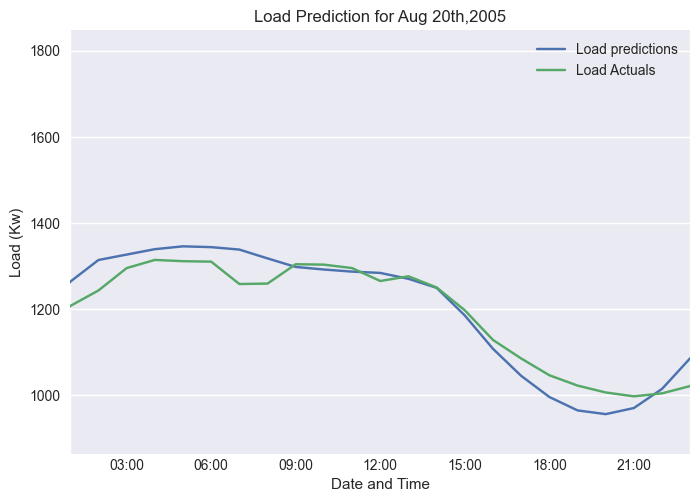

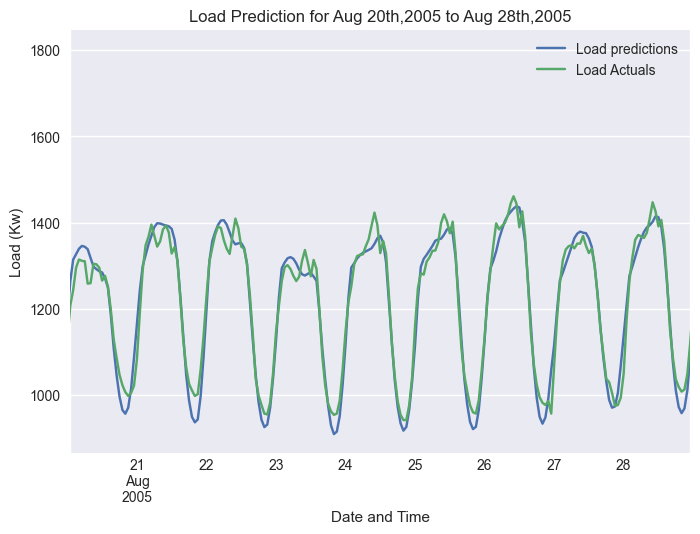

In [109]:
df = pd.DataFrame(data={'Load predictions': l_preds,
                          'Load Actuals':l_actuals,  })

#df.plot(xlim=[100,200])

temp=ldt['2005-08-01':'2005-08-31']
aug=temp.reset_index()

# pd.concat([df.set_index(cols).value for df in dfs],axis=1, keys=keys)
summer= pd.concat([aug,df], axis=1)
summer.set_index("Time")
summer.plot(x='Time',y=['Load predictions', "Load Actuals"], xlim=[dt.datetime(2005,8,20,1,0,0),dt.datetime(2005,8,20,23,0,0)], ylabel='Load (Kw)', xlabel='Date and Time',title='Load Prediction for Aug 20th,2005')
summer.plot(x='Time',y=['Load predictions', "Load Actuals"], xlim=[dt.datetime(2005,8,20,1,0,0),dt.datetime(2005,8,28,23,0,0)], ylabel='Load (Kw)', xlabel='Date and Time',title='Load Prediction for Aug 20th,2005 to Aug 28th,2005')


# Fall season dataset training and prediction

In [110]:
X, y = dataframe_win(fal)
X.shape, y.shape

((4336, 7, 6), (4336,))

In [111]:
X_train, y_train = X[:2184], y[:2184]
X_val, y_val = X[2184:3678], y[2184:3678]
X_test, y_test = X[3678:], y[3678:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2184, 7, 6), (2184,), (1494, 7, 6), (1494,), (658, 7, 6), (658,))

In [112]:
load_train_mean = np.mean(X_train[:, :, 0])
load_train_std = np.std(X_train[:, :, 0])

temp_train_mean = np.mean(X_train[:, :, 1])
temp_train_std = np.std(X_train[:, :, 1])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - load_train_mean) / load_train_std
  X[:, :, 1] = (X[:, :, 1] - temp_train_mean) / temp_train_std

def preprocess_output(y):
  y[:] = (y[:] - load_train_mean) / load_train_std



In [113]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)
preprocess_output(y_train)
preprocess_output(y_val)
preprocess_output(y_test)

In [114]:
model = Sequential()
model.add(InputLayer((7, 6)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 64)                18176     
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,705
Trainable params: 18,705
Non-trainable params: 0
_________________________________________________________________


In [115]:
cp = ModelCheckpoint('modelFAL_LSTM/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [116]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp])

Epoch 1/20
64/69 [==========================>...] - ETA: 0s - loss: 1.1048 - root_mean_squared_error: 1.0511

INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


69/69 [==============================] - 13s 149ms/step - loss: 1.0825 - root_mean_squared_error: 1.0404 - val_loss: 0.4924 - val_root_mean_squared_error: 0.7017
Epoch 2/20
68/69 [============================>.] - ETA: 0s - loss: 0.7741 - root_mean_squared_error: 0.8798

INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


69/69 [==============================] - 9s 133ms/step - loss: 0.7723 - root_mean_squared_error: 0.8788 - val_loss: 0.3848 - val_root_mean_squared_error: 0.6203
Epoch 3/20
69/69 [==============================] - ETA: 0s - loss: 0.5964 - root_mean_squared_error: 0.7723

INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


69/69 [==============================] - 9s 126ms/step - loss: 0.5964 - root_mean_squared_error: 0.7723 - val_loss: 0.3097 - val_root_mean_squared_error: 0.5565
Epoch 4/20
63/69 [==========================>...] - ETA: 0s - loss: 0.4586 - root_mean_squared_error: 0.6772

INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


69/69 [==============================] - 9s 135ms/step - loss: 0.4611 - root_mean_squared_error: 0.6790 - val_loss: 0.2439 - val_root_mean_squared_error: 0.4939
Epoch 5/20
64/69 [==========================>...] - ETA: 0s - loss: 0.3565 - root_mean_squared_error: 0.5971

INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


69/69 [==============================] - 8s 123ms/step - loss: 0.3531 - root_mean_squared_error: 0.5942 - val_loss: 0.1969 - val_root_mean_squared_error: 0.4437
Epoch 6/20
66/69 [===========================>..] - ETA: 0s - loss: 0.2795 - root_mean_squared_error: 0.5287

INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


69/69 [==============================] - 9s 138ms/step - loss: 0.2789 - root_mean_squared_error: 0.5281 - val_loss: 0.1634 - val_root_mean_squared_error: 0.4042
Epoch 7/20
69/69 [==============================] - ETA: 0s - loss: 0.2310 - root_mean_squared_error: 0.4806

INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


69/69 [==============================] - 8s 124ms/step - loss: 0.2310 - root_mean_squared_error: 0.4806 - val_loss: 0.1415 - val_root_mean_squared_error: 0.3761
Epoch 8/20
68/69 [============================>.] - ETA: 0s - loss: 0.1981 - root_mean_squared_error: 0.4451

INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


69/69 [==============================] - 10s 141ms/step - loss: 0.1984 - root_mean_squared_error: 0.4454 - val_loss: 0.1255 - val_root_mean_squared_error: 0.3543
Epoch 9/20
69/69 [==============================] - ETA: 0s - loss: 0.1745 - root_mean_squared_error: 0.4178

INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


69/69 [==============================] - 8s 123ms/step - loss: 0.1745 - root_mean_squared_error: 0.4178 - val_loss: 0.1114 - val_root_mean_squared_error: 0.3337
Epoch 10/20
67/69 [============================>.] - ETA: 0s - loss: 0.1563 - root_mean_squared_error: 0.3954

INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


69/69 [==============================] - 9s 131ms/step - loss: 0.1562 - root_mean_squared_error: 0.3952 - val_loss: 0.1030 - val_root_mean_squared_error: 0.3209
Epoch 11/20
63/69 [==========================>...] - ETA: 0s - loss: 0.1411 - root_mean_squared_error: 0.3756

INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


69/69 [==============================] - 9s 130ms/step - loss: 0.1416 - root_mean_squared_error: 0.3763 - val_loss: 0.0941 - val_root_mean_squared_error: 0.3067
Epoch 12/20
68/69 [============================>.] - ETA: 0s - loss: 0.1303 - root_mean_squared_error: 0.3609

INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


69/69 [==============================] - 8s 121ms/step - loss: 0.1302 - root_mean_squared_error: 0.3609 - val_loss: 0.0872 - val_root_mean_squared_error: 0.2952
Epoch 13/20
63/69 [==========================>...] - ETA: 0s - loss: 0.1208 - root_mean_squared_error: 0.3475

INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


69/69 [==============================] - 9s 132ms/step - loss: 0.1207 - root_mean_squared_error: 0.3474 - val_loss: 0.0831 - val_root_mean_squared_error: 0.2884
Epoch 14/20
67/69 [============================>.] - ETA: 0s - loss: 0.1132 - root_mean_squared_error: 0.3365

INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


69/69 [==============================] - 9s 126ms/step - loss: 0.1123 - root_mean_squared_error: 0.3352 - val_loss: 0.0746 - val_root_mean_squared_error: 0.2731
Epoch 15/20
65/69 [===========================>..] - ETA: 0s - loss: 0.1066 - root_mean_squared_error: 0.3265

INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


69/69 [==============================] - 9s 131ms/step - loss: 0.1058 - root_mean_squared_error: 0.3253 - val_loss: 0.0691 - val_root_mean_squared_error: 0.2628
Epoch 16/20
63/69 [==========================>...] - ETA: 0s - loss: 0.1003 - root_mean_squared_error: 0.3167

INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


69/69 [==============================] - 8s 111ms/step - loss: 0.0997 - root_mean_squared_error: 0.3158 - val_loss: 0.0661 - val_root_mean_squared_error: 0.2571
Epoch 17/20
67/69 [============================>.] - ETA: 0s - loss: 0.0952 - root_mean_squared_error: 0.3086

INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


69/69 [==============================] - 8s 116ms/step - loss: 0.0955 - root_mean_squared_error: 0.3090 - val_loss: 0.0620 - val_root_mean_squared_error: 0.2490
Epoch 18/20
62/69 [=========================>....] - ETA: 0s - loss: 0.0922 - root_mean_squared_error: 0.3037

INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


69/69 [==============================] - 10s 142ms/step - loss: 0.0914 - root_mean_squared_error: 0.3023 - val_loss: 0.0575 - val_root_mean_squared_error: 0.2399
Epoch 19/20
67/69 [============================>.] - ETA: 0s - loss: 0.0877 - root_mean_squared_error: 0.2962

INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


69/69 [==============================] - 8s 116ms/step - loss: 0.0876 - root_mean_squared_error: 0.2960 - val_loss: 0.0527 - val_root_mean_squared_error: 0.2295
Epoch 20/20
65/69 [===========================>..] - ETA: 0s - loss: 0.0860 - root_mean_squared_error: 0.2932

INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


INFO:tensorflow:Assets written to: modelFAL_LSTM\assets


69/69 [==============================] - 9s 133ms/step - loss: 0.0851 - root_mean_squared_error: 0.2918 - val_loss: 0.0508 - val_root_mean_squared_error: 0.2253


In [117]:
from tensorflow.keras.models import load_model
model = load_model('modelFAL_LSTM/')

In [118]:
def postprocess_output(y):
  y[:] = (y[:] * load_train_std)  + load_train_mean
  

In [119]:
l_preds = model.predict(X_test).flatten()
l_actuals = y_test

m = tf.keras.metrics.RootMeanSquaredError()
m.update_state(l_actuals, l_preds)
rms= m.result().numpy()
print("The root mean squared error for the prediction:", rms , "->" , (rms*100),"%")



21/21 [==============================] - 1s 4ms/step
The root mean squared error for the prediction: 0.19622424 -> 19.622424244880676 %


In [120]:
postprocess_output(l_preds)
postprocess_output(l_actuals)

<AxesSubplot: title={'center': 'Load Prediction for Oct 1st,2005 to Oct 8th,2005'}, xlabel='Date and Time', ylabel='Load (Kw)'>

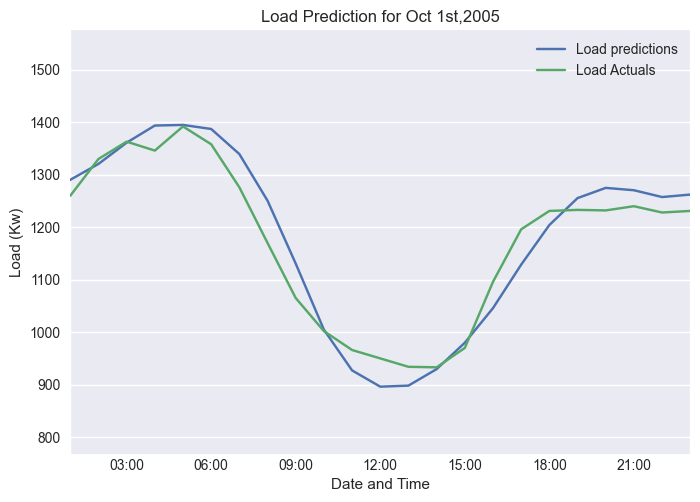

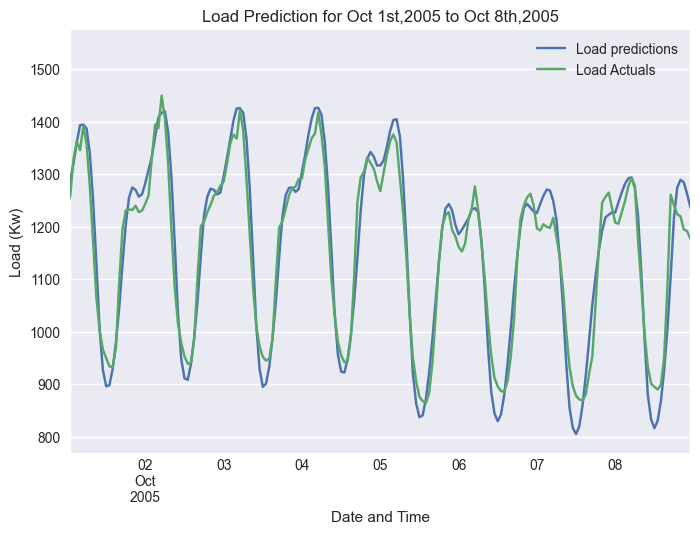

In [121]:
df = pd.DataFrame(data={'Load predictions': l_preds,
                          'Load Actuals':l_actuals,  })

#df.plot(xlim=[100,200])

temp=ldt['2005-10-01':'2005-10-30']
nov=temp.reset_index()

# pd.concat([df.set_index(cols).value for df in dfs],axis=1, keys=keys)
fall= pd.concat([nov,df], axis=1)
fall.set_index("Time")
fall.plot(x='Time',y=['Load predictions', "Load Actuals"], xlim=[dt.datetime(2005,10,1,1,0,0),dt.datetime(2005,10,1,23,0,0)], ylabel='Load (Kw)', xlabel='Date and Time',title='Load Prediction for Oct 1st,2005')
fall.plot(x='Time',y=['Load predictions', "Load Actuals"], xlim=[dt.datetime(2005,10,1,1,0,0),dt.datetime(2005,10,8,23,0,0)], ylabel='Load (Kw)', xlabel='Date and Time',title='Load Prediction for Oct 1st,2005 to Oct 8th,2005')